# Ого, ещё один котик
![Cat](https://3zvzd.blob.core.windows.net/mimimi/24161.jpg)

## Решение матричным методом
Рассмотрим систему из 4 линейных уравнений с 4 неизвестными:

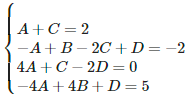

Составим коэффициентов при неизвестных, матрицу неизвестных и матрицу свободных членов соответствующие заданному уравнению

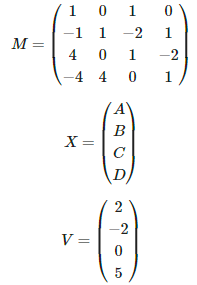

Запишем полученные матрицу коэффициентов при неизвестных и матрицу свободных членов в numpy массивы:

In [1]:
import numpy as np
M = np.matrix('1 0 1 0; -1 1 -2 1; 4 0 1 -2; -4 4 0 1')
V = np.matrix ('2; -2; 0; 5')

Теперь необходимо проверить является ли матрица вырожденной (определитель равен 0) от этого будет зависеть сможем ли вообще использовать матричный метод для решения данного уравнения

In [2]:
opr = np.linalg.det(M)
print(opr)

24.999999999999996


Определитель не равен 0, а следовательно можно использовать матричный метод решения

Найдем матрицу, обратную матрице коэффициентов при неизвестных

In [3]:
m_inv = np.linalg.inv(M)
print(m_inv)

[[ 0.52  0.32  0.12 -0.08]
 [ 0.2   0.2   0.2   0.2 ]
 [ 0.48 -0.32 -0.12  0.08]
 [ 1.28  0.48 -0.32 -0.12]]


Найдем матрицу не известных по формуле 

In [4]:
m_inv.dot(V)

matrix([[0.],
        [1.],
        [2.],
        [1.]])

Из этого сделует что: 
В библиотеке numpy для решения систем уравнений матричным методом используется функция solve из linalg, проверим правильность решения с помощью этой функции

In [5]:
np.linalg.solve(M,V)

matrix([[0.],
        [1.],
        [2.],
        [1.]])

Значения совпадают

## Решение методом Крамера
Решим выше указанное уравнение методом Крамера

Для начала объявим необходимые матрицы, а именно матрицу коэффициентов при неизвестных, матрицу свободных членов и матрицу которая будет возвращать первоначальные значения изменённому столбцу. Так же зададим список для определителей полученных в ходе подстановки значений из матрицы свободных членов в матрицу коэффициентов при неизвестных.

In [7]:
M = np.matrix('1 0 1 0; -1 1 -2 1; 4 0 1 -2; -4 4 0 1')
V = np.matrix ('2; -2; 0; 5')
check_matrix = np.matrix('0;0;0;0')
dets = []

Посчитаем изначальный определитель матрицы коэффициентов при неизвестных, его так же называют главным определителем

In [8]:
main_det = np.linalg.det(M)

Для решения системы уравнений методом крамера нам необходимо заменять каждый столбец изначальной матрицы на матрицу свободных членов в соответствии с формулой: 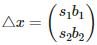 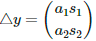

Для этого создадим цикл, который заменяет каждый столбец поочерёдно, считает определитель для данной матрицы, записывает его в список и возвращает матрицу в изначальный вид

In [9]:
i = 0
while i < len(M):
    check_matrix[:, 0] = M[:, i]
    M[:, i] = V[:, 0]
    temp_det = np.linalg.det(M)
    dets.append(temp_det)
    M[:, i] = check_matrix[:, 0]
    i += 1

Теперь осталось только сделать из полученного списка numpy массив и разделить каждый элемент этого массива на главный определитель

In [10]:
dets = np.array(dets)
result = dets // main_det
print(result)

[0. 1. 2. 1.]


Полученная матрица сходится с результатами предыдущего метода, из чего можно сделать вывод, что алгоритм работает корректно.